# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [2]:
!pip install palmerpenguins

In [3]:
# Code Here
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from plotnine import *

# Q1: The dummified variables that we need are species, sex, and island

# Q2: Defining the target and the explanatory variables
penguins = load_penguins().dropna()
y = penguins['bill_depth_mm'].to_numpy()
X = penguins[['bill_length_mm']].to_numpy()

# defining points to plot the original data points
points = pd.DataFrame({
    'bill_length_mm': X.flatten(),
    'bill_depth_mm': y
})

# Building design matrices per degree
X1 = X
poly2 = PolynomialFeatures(degree=2, include_bias=False); X2 = poly2.fit_transform(X)
poly3 = PolynomialFeatures(degree=3, include_bias=False); X3 = poly3.fit_transform(X)
poly10 = PolynomialFeatures(degree=10, include_bias=False); X10 = poly10.fit_transform(X)

# Fitting linear regression models
model1 = LinearRegression().fit(X1, y)
model2 = LinearRegression().fit(X2, y)
model3 = LinearRegression().fit(X3, y)
model10 = LinearRegression().fit(X10, y)

# Implementing smooth grid for predictions
xg = np.linspace(X.min(), X.max(), 400).reshape(-1, 1)
X1g = xg
X2g = poly2.fit_transform(xg)
X3g = poly3.fit_transform(xg)
X10g = poly10.fit_transform(xg)

# Making predictions
y1 = model1.predict(X1g)
y2 = model2.predict(X2g)
y3 = model3.predict(X3g)
y10 = model10.predict(X10g)

# Tidying the data for plotting
plot = pd.concat([
    pd.DataFrame({'bill_length_mm': xg.flatten(), 'bill_depth_mm': y1, 'degree': 1}),
    pd.DataFrame({'bill_length_mm': xg.flatten(), 'bill_depth_mm': y2, 'degree': 2}),
    pd.DataFrame({'bill_length_mm': xg.flatten(), 'bill_depth_mm': y3, 'degree': 3}),
    pd.DataFrame({'bill_length_mm': xg.flatten(), 'bill_depth_mm': y10, 'degree': 10})
], ignore_index=True)


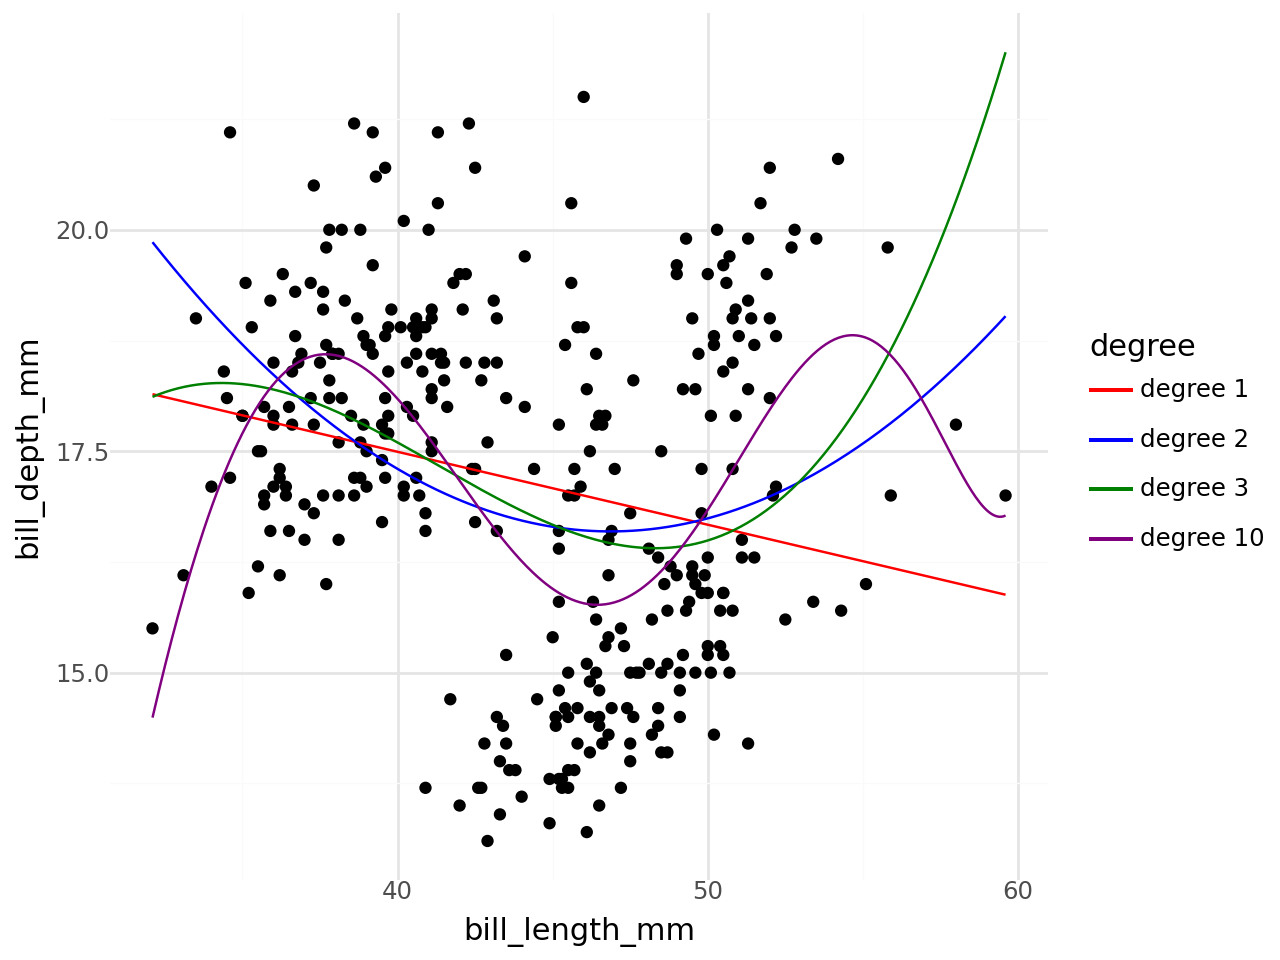

In [ ]:
(
  ggplot(points, aes(x='bill_length_mm', y='bill_depth_mm'))
  + geom_point()
  + geom_line(plot[plot['degree'] == 1], aes(x='bill_length_mm', y='bill_depth_mm', color='"degree 1"'))
  + geom_line(plot[plot['degree'] == 2], aes(x='bill_length_mm', y='bill_depth_mm', color='"degree 2"'))
  + geom_line(plot[plot['degree'] == 3], aes(x='bill_length_mm', y='bill_depth_mm', color='"degree 3"'))
  + geom_line(plot[plot['degree'] == 10], aes(x='bill_length_mm', y='bill_depth_mm', color='"degree 10"'))
  + scale_color_manual(name='degree', values={'degree 1': 'red', 'degree 2':'blue', 'degree 3': 'green', 'degree 10': 'purple'})
  + theme_minimal()
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

In this dataset, the relationship between bill_length_mm and bill_depth_mm is weak, and without any pattern. As there is no relationship to capture, there won't be a model that 'fits' the data well, even the more complex polynomial models.

1. Model 1 (linear regression) can be described as the most underfitting, you're able to tell because it captures the trend of the data the least, as it is too simple to capture non linearity in the scatter pattern.

2. Similarily, model 2, 3, and 10 aren't significantly overfitting, they are attempting to capture as much of the noise in the data as possible. Overall, we can say that bill length alone isn't a significant predictor of bill depth.

3. Degrees 2-3 capture the trend of the data the best with the gentle curvature without too many oscillations. Again, bill length has limited predictive power of bill depth, so the 'best' line of fit has weak explanatory strength.